In [1]:
import pickle
import pathlib

import sys
sys.path.append('../src/')

import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
result_path_str = pathlib.Path('results')
bagged_MLP_path = result_path_str / "SKlearn_baggingMLP_over_n_members_winequality_regression.pkl"
with open(bagged_MLP_path, 'rb') as f:
    bagged_MLP_result = pickle.load(f)

In [3]:
bagged_tree_path = result_path_str / "SKlearn_baggedTree_over_n_members_winequality_regression.pkl"
with open(bagged_tree_path, 'rb') as f:
    bagged_tree_result = pickle.load(f)

In [4]:
torch_ind_MLP_path = result_path_str / "Torch_Independent_MLP_over_n_members_winequality_regression10.pkl"
with open(torch_ind_MLP_path, 'rb') as f:
    torch_ind_mlp_result = pickle.load(f)

In [5]:
matplotlib.rc('font', size=24)

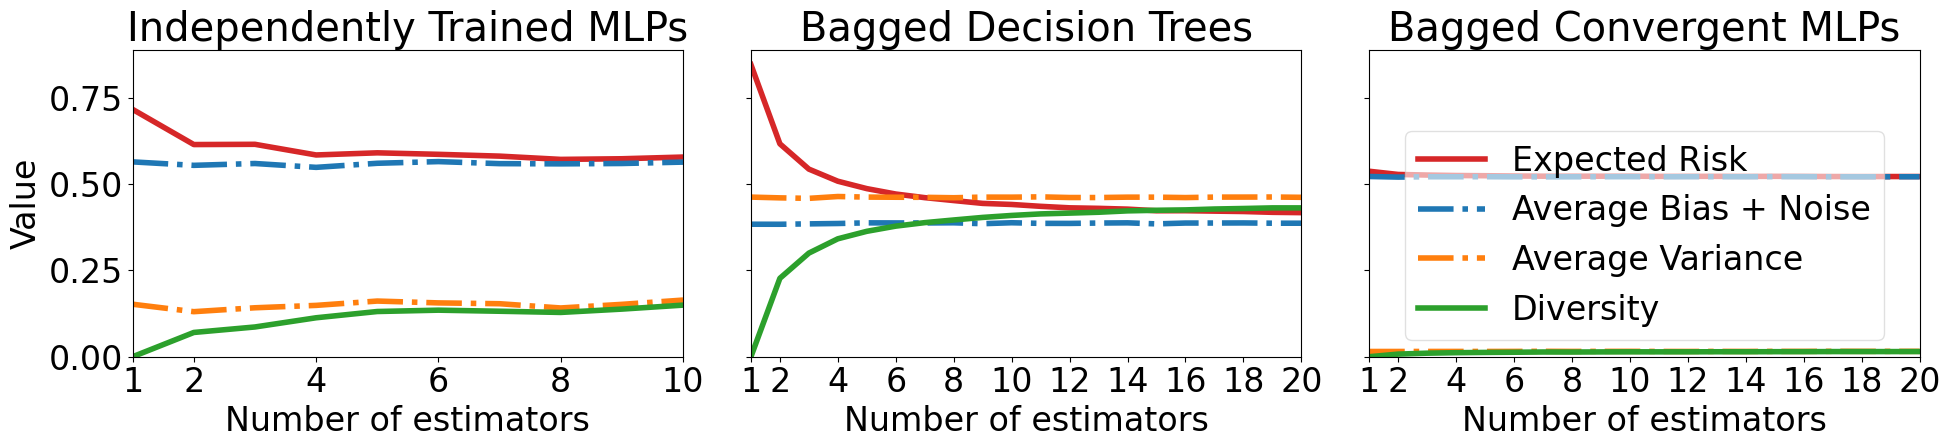

In [6]:
xvals = torch_ind_mlp_result.parameter_values

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(20,5))


axs = [ax1, ax2, ax3]
results = [torch_ind_mlp_result, bagged_tree_result, bagged_MLP_result]

ax1.set_title("Independently Trained MLPs")
ax2.set_title("Bagged Decision Trees")
ax3.set_title("Bagged Convergent MLPs")

linewidth = 4

for i, ax in enumerate(axs):
    result = results[i]
    ax.plot(result.parameter_values, result.ensemble_risk, label="Expected Risk", color='tab:red', linewidth=linewidth)
    ax.plot(result.parameter_values, result.average_bias, label="Average Bias + Noise", linestyle="dashdot", color='tab:blue', linewidth=linewidth)
    ax.plot(result.parameter_values, result.average_variance, label="Average Variance", linestyle="dashdot", color='tab:orange', linewidth=linewidth)
    ax.plot(result.parameter_values, result.diversity, label="Diversity", color='tab:green', linewidth=linewidth)

    ax.set_xlabel("Number of estimators")

    even_vals = [1] + [x for x in result.parameter_values if x % 2 == 0]
    ax.set_xticks(even_vals)
    ax.set_xlim(1,np.max(even_vals))
    if i == 2:
        ax.legend(framealpha=0.6)

# fig.suptitle("Sqaured Loss Bias-Variance-Diversity Decompositions Varying Members for Winequality Dataset Regression")

ax1.set_ylabel("Value")
ax1.set_ylim(0)



# plt.legend()
plt.tight_layout()
plt.savefig("plot_SE_member_vs_diversity.svg")
plt.show()





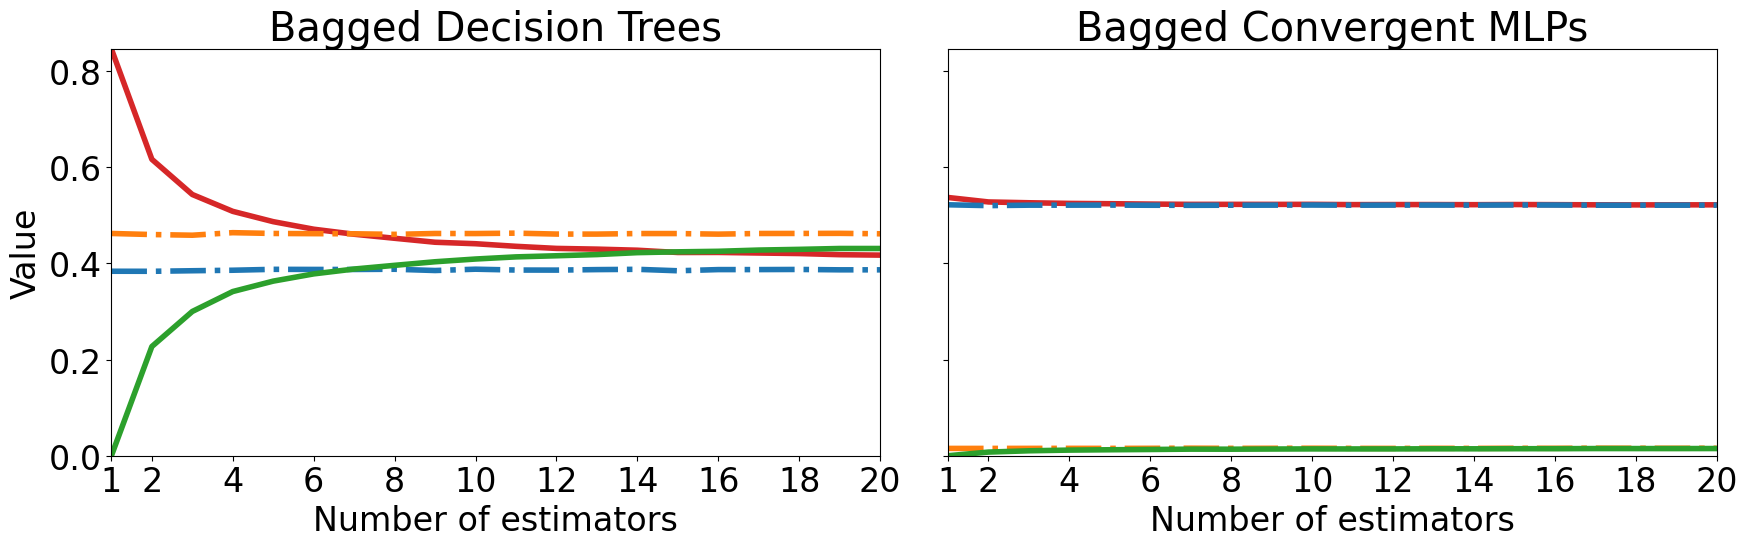

In [9]:
xvals = torch_ind_mlp_result.parameter_values

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(18,6))


axs = [ax1, ax2]
results = [bagged_tree_result, bagged_MLP_result]

ax1.set_title("Bagged Decision Trees")
ax2.set_title("Bagged Convergent MLPs")
# ax3.set_title("")

linewidth = 4

for i, ax in enumerate(axs):
    result = results[i]
    ax.plot(result.parameter_values, result.ensemble_risk, label="Expected Risk", color='tab:red', linewidth=linewidth)
    ax.plot(result.parameter_values, result.average_bias, label="Average Bias + Noise", linestyle="dashdot", color='tab:blue', linewidth=linewidth)
    ax.plot(result.parameter_values, result.average_variance, label="Average Variance", linestyle="dashdot", color='tab:orange', linewidth=linewidth)
    ax.plot(result.parameter_values, result.diversity, label="Diversity", color='tab:green', linewidth=linewidth)

    ax.set_xlabel("Number of estimators")

    even_vals = [1] + [x for x in result.parameter_values if x % 2 == 0]
    ax.set_xticks(even_vals)
    ax.set_xlim(1,np.max(even_vals))
    if i == 1:
        p = 1

# fig.suptitle("Sqaured Loss Bias-Variance-Diversity Decompositions Varying Members for Winequality Dataset Regression")

ax1.set_ylabel("Value")
ax1.set_ylim(0, np.max(bagged_tree_result.ensemble_risk))

# plt.legend()
plt.tight_layout()
plt.savefig("plot_SE_member_vs_diversity_BAGG.svg")
plt.show()

ticks = ax1.get_yticks()


/tmp/ipykernel_33627/1960997557.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


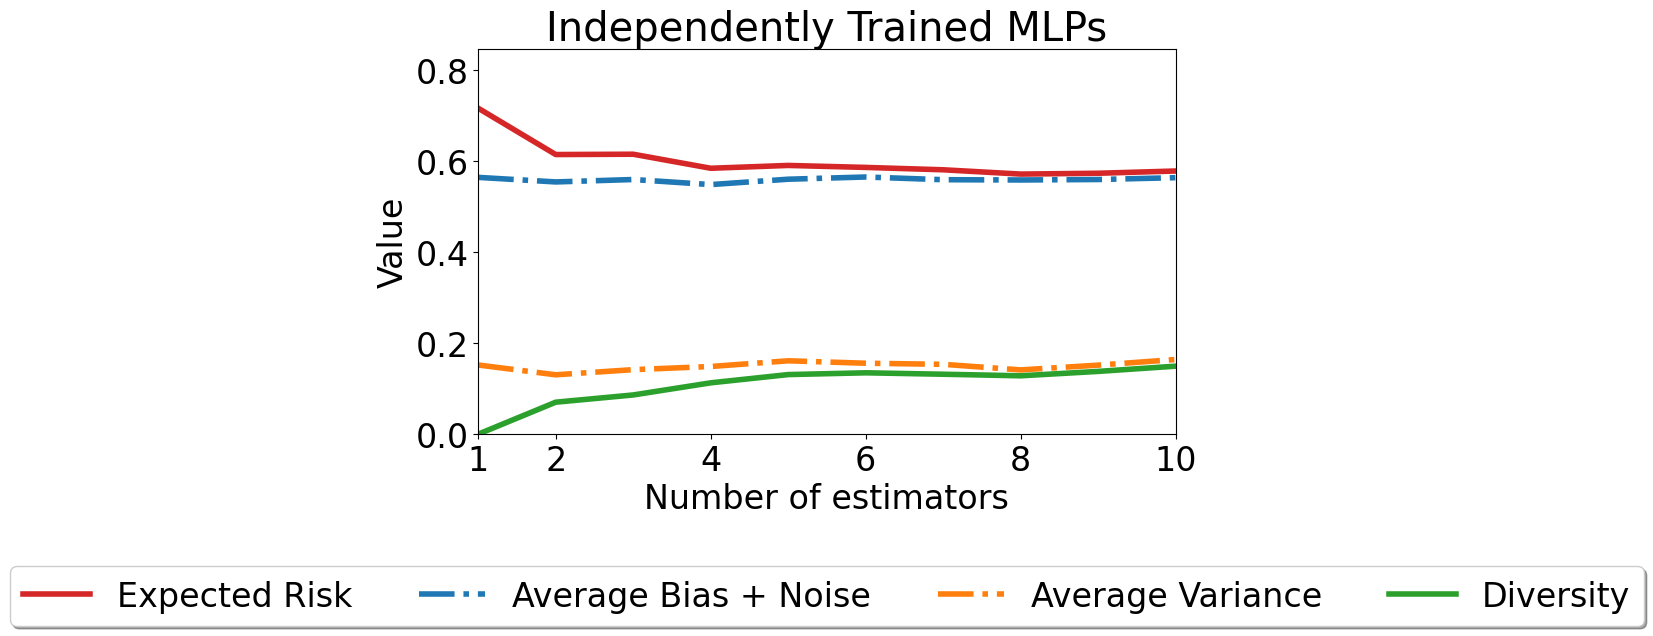

In [8]:
xvals = torch_ind_mlp_result.parameter_values

fig, ax = plt.subplots(figsize=(9,5))

results = [torch_ind_mlp_result]

plt.title("Independently Trained MLPs")

linewidth = 4
for result in results:
    plt.plot(result.parameter_values, result.ensemble_risk, label="Expected Risk", color='tab:red', linewidth=linewidth)
    plt.plot(result.parameter_values, result.average_bias, label="Average Bias + Noise", linestyle="dashdot", color='tab:blue', linewidth=linewidth)
    plt.plot(result.parameter_values, result.average_variance, label="Average Variance", linestyle="dashdot", color='tab:orange', linewidth=linewidth)
    plt.plot(result.parameter_values, result.diversity, label="Diversity", color='tab:green', linewidth=linewidth)

    plt.xlabel("Number of estimators")

    even_vals = [1] + [x for x in result.parameter_values if x % 2 == 0]
    ax.set_xticks(even_vals)
    ax.set_xlim(1,np.max(even_vals))
    if i == 2:
        ax.legend(framealpha=0.6)

# fig.suptitle("Sqaured Loss Bias-Variance-Diversity Decompositions Varying Members for Winequality Dataset Regression")

plt.ylabel("Value")
plt.ylim(0, np.max(bagged_tree_result.ensemble_risk))
plt.yticks([0, 0.2, 0.4, 0.6, 0.8])




plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, shadow=True, ncol=4)

plt.tight_layout()
plt.savefig("plot_SE_member_vs_diversity_ITMLP.svg", bbox_inches='tight')
plt.show()